In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import sys

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
import gym

In [3]:
env = gym.make('MsPacman-v0')

In [4]:
obs = env.reset()

In [5]:
obs.shape

(210, 160, 3)

In [6]:
img = env.render(mode="rgb_array")

<IPython.core.display.Javascript object>


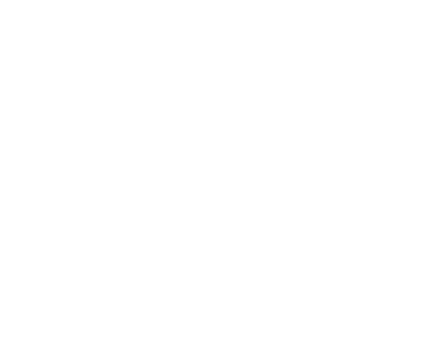

In [7]:
plt.figure(figsize=(5,4))
plt.imshow(img)
plt.axis("off")
plt.show()

In [8]:
(img == obs).all()

True

In [9]:
def plot_enviroment(env,figsize=(5,4)):
    plt.close()
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [10]:
env.action_space

Discrete(9)

In [11]:
env.reset()
for step in range(110):
    env.step(3)
for step in range(40):
    env.step(8)

<IPython.core.display.Javascript object>


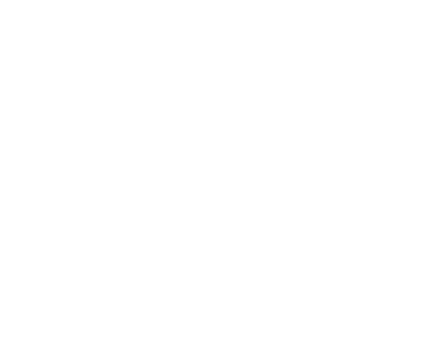

In [12]:
plot_enviroment(env)

In [13]:
obs, reward, done, info = env.step(0)

In [14]:
obs.shape

(210, 160, 3)

In [15]:
reward

0.0

In [16]:
done

False

In [17]:
info

{'ale.lives': 3}

In [18]:
frames = []
n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = env.render(mode="rgb_array")
    frames.append(img)
    if step % n_change_steps == 0:
        action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    if done:
        break

In [19]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames,repeat=False,interval=40):
    plt.close()
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene,fargs=(frames,patch),frames=len(frames),repeat=repeat, interval=interval)

<IPython.core.display.Javascript object>


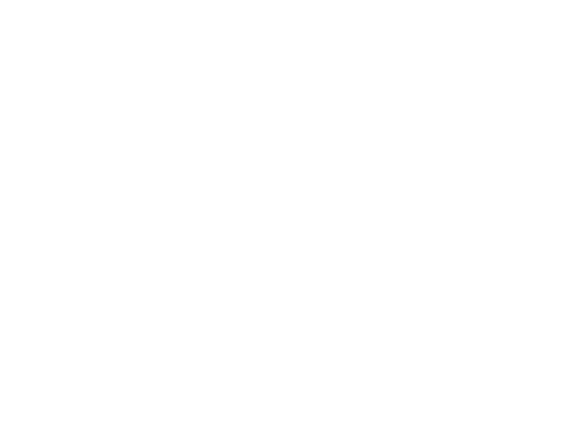

In [20]:
video = plot_animation(frames)
plt.show()

In [21]:
env.close()

In [22]:
env = gym.make("CartPole-v0")

/home/bartosz/anaconda3/envs/tensorflow/lib/python3.5/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [23]:
obs = env.reset()

In [24]:
obs

array([ 0.00158062, -0.03510391, -0.02486366,  0.0227664 ])

In [25]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True  
except Exception:
    openai_cart_pole_rendering = False  
def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        return env.render(mode="rgb_array")
    else:
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # Blue Green Red
        pole_col = 0x669acc # Blue Green Red

        pos, vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, obs):
    plt.close() 
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>


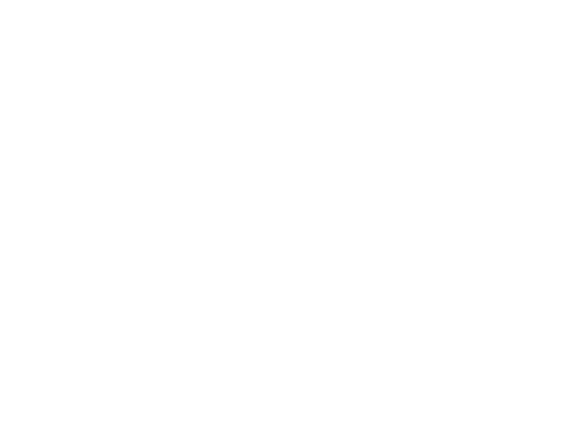

In [26]:
plot_cart_pole(env, obs)

In [27]:
env.action_space

Discrete(2)

In [28]:
obs = env.reset()
while True:
    obs, reward, done, info = env.step(0)
    if done:
        break

<IPython.core.display.Javascript object>


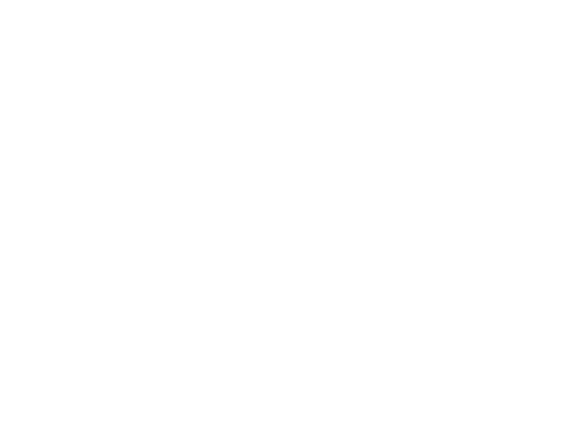

(-0.5, 599.5, 399.5, -0.5)

In [29]:
plt.close()
img = render_cart_pole(env,obs)
plt.imshow(img)
plt.axis("off")

In [30]:
img.shape

(400, 600, 3)

In [31]:
obs = env.reset()
while True:
    obs, reward, done, info = env.step(1)
    if done:
        break

<IPython.core.display.Javascript object>


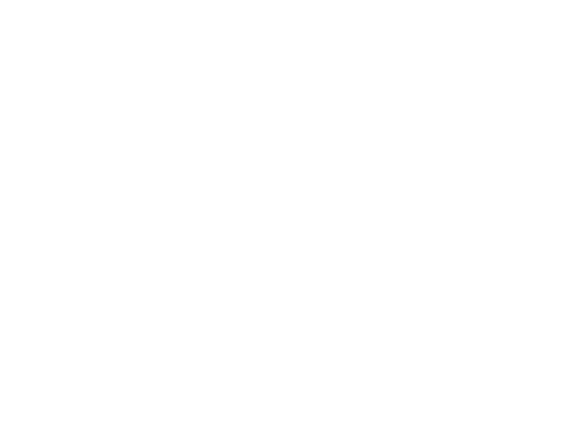

In [32]:
plot_cart_pole(env, obs)

In [33]:
frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = render_cart_pole(env, obs)
    frames.append(img)
    
    position, valocity, angle, angular_velocity = obs 
    if angle < 0:
        action = 0
    else: 
        action = 1
        
    obs, reward, done, info = env.step(action)
    if done:
        break

<IPython.core.display.Javascript object>


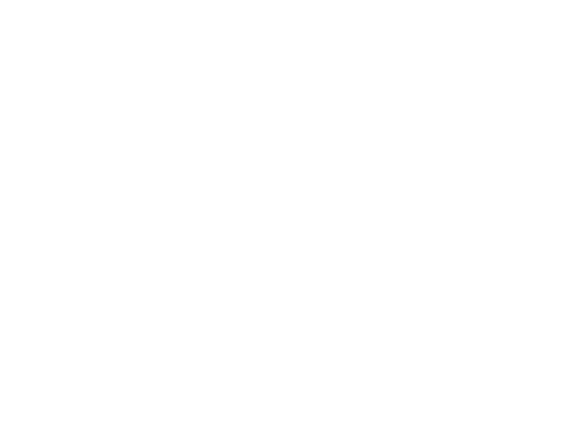

In [34]:
video = plot_animation(frames)
plt.show()

In [35]:
import tensorflow as tf

In [36]:
n_inputs = 4  # == env.observation_space.shape[0]
n_hidden = 4 
n_outputs = 1 
initializer = tf.variance_scaling_initializer()

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu,
                         kernel_initializer=initializer)
outputs = tf.layers.dense(hidden, n_outputs, activation=tf.nn.sigmoid,
                          kernel_initializer=initializer)

p_left_and_right = tf.concat(axis=1, values=[outputs, 1 - outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

init = tf.global_variables_initializer()

In [37]:
n_max_steps = 1000
frames = []

with tf.Session() as sess:
    init.run()
    obs = env.reset()
    for step in range(n_max_steps):
        img = render_cart_pole(env, obs)
        frames.append(img)
        action_val = action.eval(feed_dict={X: obs.reshape(1, n_inputs)})
        obs, reward, done, info = env.step(action_val[0][0])
        if done:
            break

env.close()

<IPython.core.display.Javascript object>


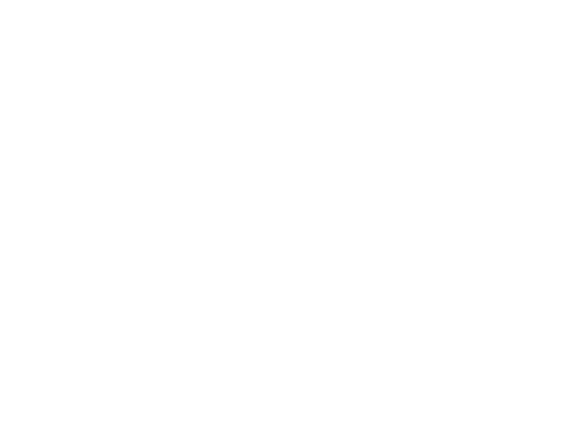

In [38]:
video = plot_animation(frames)
plt.show()

In [39]:
reset_graph()

In [40]:
n_inputs = 4 
n_hidden = 4 
n_outputs = 1 

learning_rate = 0.01

initializer = tf.variance_scaling_initializer()

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
y = tf.placeholder(tf.float32, shape=[None, n_outputs])

hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu, kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs)
outputs = tf.nn.sigmoid(logits)
p_left_and_right = tf.concat(axis=1, values=[outputs,1-outputs])
action = tf.multinomial(tf.log(p_left_and_right),num_samples=1)

cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cross_entropy)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [41]:
n_enviroments = 10
n_iterations = 1000

envs = [gym.make("CartPole-v0") for _ in range(n_enviroments)]
observations = [env.reset() for env in envs] 

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        target_probas = np.array([([1.] if obs[2] < 0 else [0.]) for obs in observations])
        action_val, _ = sess.run([action, training_op], feed_dict={X: np.array(observations), y:target_probas})
        for env_index, env in enumerate(envs):
            obs, reward, done, info = env.step(action_val[env_index][0])
            observations[env_index] = obs if not done else env.reset()
    saver.save(sess,"./my_policy_net_basic.ckpt")
        
for env in envs:
    env.close()

/home/bartosz/anaconda3/envs/tensorflow/lib/python3.5/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [42]:
def render_policy_nets(model_path, action, X, n_max_steps=1000):
    frames = [] 
    env = gym.make("CartPole-v0")
    obs = env.reset()
    with tf.Session() as sess:
        saver.restore(sess, model_path)
        for step in range(n_max_steps):
            img = render_cart_pole(env, obs)
            frames.append(img)
            action_val = action.eval(feed_dict={X: obs.reshape(1, n_inputs)})
            obs, reward, done, info = env.step(action_val[0][0])
            if done:
                break
        env.close()
        return frames

INFO:tensorflow:Restoring parameters from ./my_policy_net_basic.ckpt


/home/bartosz/anaconda3/envs/tensorflow/lib/python3.5/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


<IPython.core.display.Javascript object>


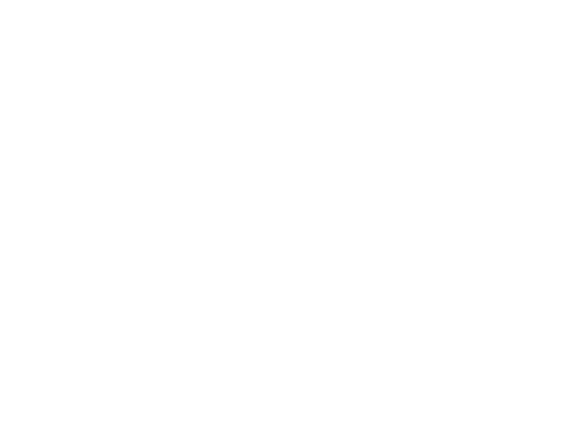

In [43]:
frames = render_policy_nets("./my_policy_net_basic.ckpt", action, X)
video = plot_animation(frames)
plt.show()

In [44]:
reset_graph()

In [45]:
n_inputs = 4 
n_hidden = 4 
n_outputs = 1 

learning_rate = 0.01 
initializer = tf.variance_scaling_initializer()

X = tf.placeholder(tf.float32, shape=[None, n_inputs])

hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.relu, kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs)
outputs = tf.nn.sigmoid(logits)
p_left_and_right = tf.concat(axis=1, values=[outputs, 1 - outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

y = 1. - tf.to_float(action)
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
optimizer = tf.train.AdamOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(cross_entropy)
gradients = [grad for grad, variable in grads_and_vars]
gradient_placeholders = [] 
grads_and_vars_feed = []
for grad, variable in grads_and_vars:
    gradient_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
    gradient_placeholders.append(gradient_placeholder)
    grads_and_vars_feed.append((gradient_placeholder, variable))
training_op = optimizer.apply_gradients(grads_and_vars_feed)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [46]:
def discount_rewards(rewards, discount_rate):
    discount_rewards = np.zeros(len(rewards))
    cumulative_rewards = 0 
    for step in reversed(range(len(rewards))):
        cumulative_rewards = rewards[step] + cumulative_rewards * discount_rate
        discount_rewards[step] = cumulative_rewards
    return discount_rewards

def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate) for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discount_rewards - reward_mean) / reward_std for discount_rewards in all_discounted_rewards]

In [47]:
discount_rewards([10, 0, -50], discount_rate=0.8)

array([-22., -40., -50.])

In [48]:
discount_and_normalize_rewards([[10,0,-50], [10,20]], discount_rate=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [49]:
env = gym.make("CartPole-v0")

n_games_per_update = 10
n_max_steps = 1000
n_iterations = 250
save_iterations = 10
discount_rate = 0.95

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        print("\rIteration: {}".format(iteration), end="")
        all_rewards = []
        all_gradients = [] 
        for game in range(n_games_per_update):
            current_rewards = []
            current_gradients = []
            obs = env.reset()
            for step in range(n_max_steps):
                action_val, gradients_val = sess.run([action, gradients], feed_dict={X: obs.reshape(1, n_inputs)})
                obs, reward, done, info = env.step(action_val[0][0])
                current_rewards.append(reward)
                current_gradients.append(gradients_val)
                if done:
                    break
            all_rewards.append(current_rewards)
            all_gradients.append(current_gradients)
            
        all_rewards = discount_and_normalize_rewards(all_rewards, discount_rate=discount_rate)
        feed_dict = {}
        for var_index, gradient_placeholder in enumerate(gradient_placeholders):
            mean_gradients = np.mean([reward * all_gradients[game_index][step][var_index] for game_index, rewards in enumerate(all_rewards)
                                     for step, reward in enumerate(rewards)], axis=0)
            feed_dict[gradient_placeholder] = mean_gradients
        sess.run(training_op, feed_dict=feed_dict)
        if iteration % save_iterations == 0:
            saver.save(sess,"./my_policy_net_pg.ckpt")

/home/bartosz/anaconda3/envs/tensorflow/lib/python3.5/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Iteration: 249

In [50]:
env.close()

INFO:tensorflow:Restoring parameters from ./my_policy_net_pg.ckpt


/home/bartosz/anaconda3/envs/tensorflow/lib/python3.5/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


<IPython.core.display.Javascript object>


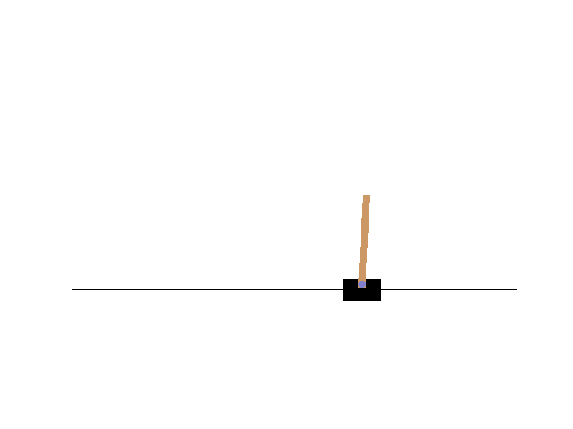

In [51]:
frames = render_policy_nets("./my_policy_net_pg.ckpt",action, X, n_max_steps=1000)
video = plot_animation(frames)
plt.show()

In [52]:
transition_probabilities = [
    [0.7, 0.2, 0.0, 0.1],
    [0.0, 0.0, 0.9, 0.1],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 1.0],
]

n_max_steps = 50 

def print_sequence(start_state=0):
    current_state = start_state
    print("States:",end="")
    for step in range(n_max_steps):
        print(current_state, end=" ")
        if current_state == 3:
            break
        current_state = np.random.choice(range(4),p=transition_probabilities[current_state])
    else:
        print("...", end="")
    print()
for _ in range(10):
    print_sequence()

States:0 0 3 
States:0 1 2 1 2 1 2 1 2 1 3 
States:0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
States:0 3 
States:0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
States:0 1 3 
States:0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 ...
States:0 0 3 
States:0 0 0 1 2 1 2 1 3 
States:0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 


In [53]:
transition_probabilities = [
        [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]], # in s0, if action a0 then proba 0.7 to state s0 and 0.3 to state s1, etc.
        [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
        [None, [0.8, 0.1, 0.1], None],
    ]

rewards = [
        [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
        [[0, 0, 0], [+40, 0, 0], [0, 0, 0]],
    ]

possible_actions = [[0, 1, 2], [0, 2], [1]]

def policy_fire(state):
    return [0, 2, 1][state]

def policy_random(state):
    return np.random.choice(possible_actions[state])

def policy_safe(state):
    return [0, 0, 1][state]

class MDPEnvironment(object):
    def __init__(self, start_state=0):
        self.start_state=start_state
        self.reset()
    def reset(self):
        self.total_rewards = 0
        self.state = self.start_state
    def step(self, action):
        next_state = np.random.choice(range(3), p=transition_probabilities[self.state][action])
        reward = rewards[self.state][action][next_state]
        self.state = next_state
        self.total_rewards += reward
        return self.state, reward

def run_episode(policy, n_steps, start_state=0, display=True):
    env = MDPEnvironment()
    if display:
        print("States (+rewards):", end=" ")
    for step in range(n_steps):
        if display:
            if step == 10:
                print("...", end=" ")
            elif step < 10:
                print(env.state, end=" ")
        action = policy(env.state)
        state, reward = env.step(action)
        if display and step < 10:
            if reward:
                print("({})".format(reward), end=" ")
    if display:
        print("Total rewards =", env.total_rewards)
    return env.total_rewards

for policy in (policy_fire, policy_random, policy_safe):
    all_totals = []
    print(policy.__name__)
    for episode in range(1000):
        all_totals.append(run_episode(policy, n_steps=100, display=(episode<5)))
    print("Summary: mean={:.1f}, std={:1f}, min={}, max={}".format(np.mean(all_totals), np.std(all_totals), np.min(all_totals), np.max(all_totals)))
    print()



policy_fire
States (+rewards): 0 (10) 0 (10) 0 1 (-50) 2 2 2 (40) 0 (10) 0 (10) 0 (10) ... Total rewards = 210
States (+rewards): 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 1 (-50) 2 2 (40) 0 (10) ... Total rewards = 70
States (+rewards): 0 (10) 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) ... Total rewards = 70
States (+rewards): 0 1 (-50) 2 1 (-50) 2 (40) 0 (10) 0 1 (-50) 2 (40) 0 ... Total rewards = -10
States (+rewards): 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 1 (-50) 2 (40) 0 (10) 0 (10) ... Total rewards = 290
Summary: mean=121.1, std=129.333766, min=-330, max=470

policy_random
States (+rewards): 0 1 (-50) 2 1 (-50) 2 (40) 0 1 (-50) 2 2 (40) 0 ... Total rewards = -60
States (+rewards): 0 (10) 0 0 0 0 0 (10) 0 0 0 (10) 0 ... Total rewards = -30
States (+rewards): 0 1 1 (-50) 2 (40) 0 0 1 1 1 1 ... Total rewards = 10
States (+rewards): 0 (10) 0 (10) 0 0 0 0 1 (-50) 2 (40) 0 0 ... Total rewards = 0
States (+rewards): 0 0 (10) 0 1 (-50) 2 (40) 0 0 0 0 (10) 0 (10) ... Total rewards = 40

In [54]:
n_states = 3 
n_actions = 3 
n_steps = 20000
alpha = 0.01
gamma = 0.99
exploration_policy = policy_random
q_values = np.full((n_states, n_actions), -np.inf)
for state, actions in enumerate(possible_actions):
    q_values[state][actions]=0
    
env = MDPEnvironment()
for step in range(n_steps):
    action = exploration_policy(env.state)
    state = env.state
    next_state, reward = env.step(action)
    next_value = np.max(q_values[next_state])
    q_values[state, action] = (1-alpha) * q_values[state,action] + alpha * (reward + gamma * next_value)

In [55]:
def optimal_policy(state):
    return np.argmax(q_values[state])

In [56]:
q_values

array([[39.13508139, 38.88079412, 35.23025716],
       [18.9117071 ,        -inf, 20.54567816],
       [       -inf, 72.53192111,        -inf]])

In [57]:
all_totals = [] 
for episode in range(1000):
    all_totals.append(run_episode(optimal_policy, n_steps=100, display=(episode<5)))
print("Summary: mean={:.1f}, std={:1f}, min={}, max={}".format(np.mean(all_totals),np.std(all_totals)
                                                              ,np.min(all_totals),np.max(all_totals)))
print()

States (+rewards): 0 (10) 0 (10) 0 1 (-50) 2 (40) 0 (10) 0 1 (-50) 2 (40) 0 (10) ... Total rewards = 230
States (+rewards): 0 (10) 0 (10) 0 (10) 0 1 (-50) 2 2 1 (-50) 2 (40) 0 (10) ... Total rewards = 90
States (+rewards): 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) ... Total rewards = 170
States (+rewards): 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) ... Total rewards = 220
States (+rewards): 0 1 (-50) 2 (40) 0 (10) 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) ... Total rewards = -50
Summary: mean=125.6, std=127.363464, min=-290, max=500



In [58]:
env = gym.make("MsPacman-v0")
obs = env.reset()
obs.shape

(210, 160, 3)

In [59]:
env.action_space

Discrete(9)

In [61]:
mspacman_color = 210 + 164 + 74

def preprocess_observation(obs):
    img = obs[1:176:2, ::2] 
    img = img.sum(axis=2) 
    img[img==mspacman_color] = 0 
    img = (img // 3 - 128).astype(np.int8) 
    return img.reshape(88, 80, 1)

img = preprocess_observation(obs)

<IPython.core.display.Javascript object>


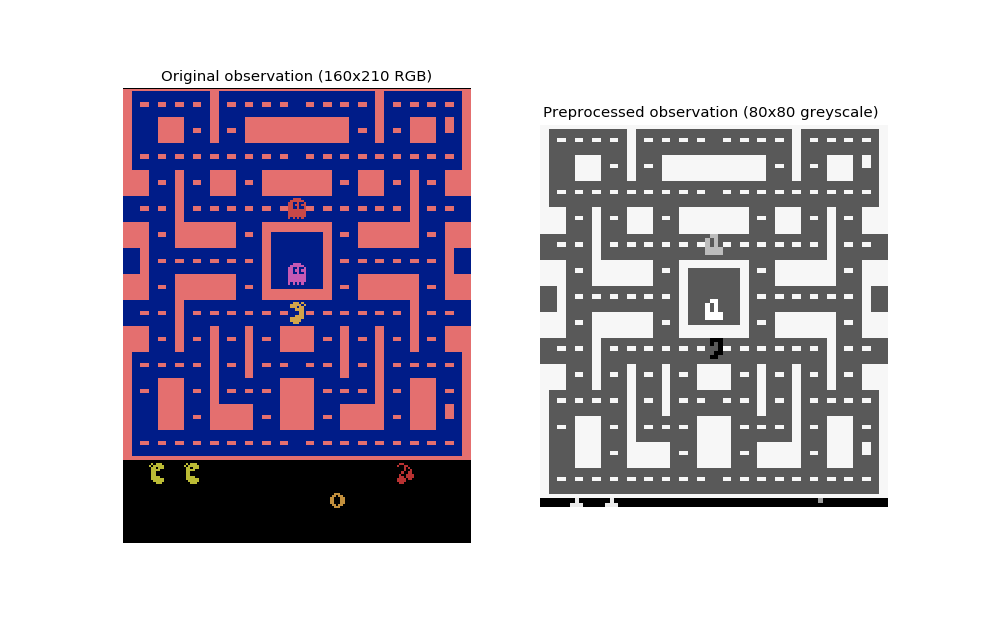

In [64]:
plt.figure(figsize=(11,7))
plt.subplot(121)
plt.title("Original observation (160x210 RGB)")
plt.imshow(obs)
plt.axis("off")
plt.subplot(122)
plt.title("Preprocessed observation (80x80 greyscale) ")
plt.imshow(img.reshape(88, 80),interpolation="nearest", cmap="gray")
plt.axis("off")
plt.show()

In [65]:
reset_graph()

In [67]:
input_height = 88
input_width = 80
input_channels = 1 
conv_n_maps = [32, 64, 64]
conv_kernel_sizes = [(8, 8), (4, 4), (3, 3)]
conv_strides = [4, 2, 1]
conv_paddings = ["SAME"] * 3 
conv_activation = [tf.nn.relu] * 3
n_hidden_in = 64 * 10 * 11
n_hidden = 512
hidden_activation = tf.nn.relu
n_outputs = env.action_space.n # 9 discrete actions
initializer = tf.variance_scaling_initializer()

def q_network(X_state, name):
    prev_layer = X_state / 128.0
    with tf.variable_scope(name) as scope:
        for n_maps, kernel_size, strides, padding, activation in zip(
        conv_n_maps,conv_kernel_sizes,conv_strides,conv_paddings,conv_activation):
            prev_layer = tf.layers.conv2d(prev_layer, filters=n_maps, kernel_size=kernel_size,
                                         strides=strides, padding=padding, activation=activation, kernel_initializer=initializer)
        last_conv_layer_flat = tf.reshape(prev_layer, shape=[-1, n_hidden_in])
        hidden = tf.layers.dense(last_conv_layer_flat, n_hidden, activation=hidden_activation,kernel_initializer=initializer)
        outputs = tf.layers.dense(hidden,n_outputs, kernel_initializer=initializer)
    trainable_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=scope.name)
    trainable_vars_by_name = {var.name[len(scope.name):]: var for var in trainable_vars}
    
    return outputs, trainable_vars_by_name

In [68]:
X_state = tf.placeholder(tf.float32, shape=[None, input_height, input_width,input_channels])
online_q_values, online_vars = q_network(X_state, name="q_network/online")
target_q_values, target_vars = q_network(X_state, name="q_network/target")

copy_ops = [target_var.assign(online_vars[var_name]) for var_name, target_var in target_vars.items()]
copy_online_to_target = tf.group(*copy_ops)

In [69]:
online_vars

{'/conv2d/bias:0': <tf.Variable 'q_network/online/conv2d/bias:0' shape=(32,) dtype=float32_ref>,
 '/conv2d/kernel:0': <tf.Variable 'q_network/online/conv2d/kernel:0' shape=(8, 8, 1, 32) dtype=float32_ref>,
 '/conv2d_1/bias:0': <tf.Variable 'q_network/online/conv2d_1/bias:0' shape=(64,) dtype=float32_ref>,
 '/conv2d_1/kernel:0': <tf.Variable 'q_network/online/conv2d_1/kernel:0' shape=(4, 4, 32, 64) dtype=float32_ref>,
 '/conv2d_2/bias:0': <tf.Variable 'q_network/online/conv2d_2/bias:0' shape=(64,) dtype=float32_ref>,
 '/conv2d_2/kernel:0': <tf.Variable 'q_network/online/conv2d_2/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>,
 '/dense/bias:0': <tf.Variable 'q_network/online/dense/bias:0' shape=(512,) dtype=float32_ref>,
 '/dense/kernel:0': <tf.Variable 'q_network/online/dense/kernel:0' shape=(7040, 512) dtype=float32_ref>,
 '/dense_1/bias:0': <tf.Variable 'q_network/online/dense_1/bias:0' shape=(9,) dtype=float32_ref>,
 '/dense_1/kernel:0': <tf.Variable 'q_network/online/dense_1/kern

In [71]:
learning_rate = 0.001
momentum = 0.95

with tf.variable_scope("train"):
    X_action = tf.placeholder(tf.int32, shape=[None])
    y = tf.placeholder(tf.float32, shape=[None, 1])
    q_value = tf.reduce_sum(online_q_values * tf.one_hot(X_action, n_outputs),
                            axis=1, keepdims=True)
    error = tf.abs(y - q_value)
    clipped_error = tf.clip_by_value(error, 0.0, 1.0)
    linear_error = 2 * (error - clipped_error)
    loss = tf.reduce_mean(tf.square(clipped_error) + linear_error)

    global_step = tf.Variable(0, trainable=False, name='global_step')
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum, use_nesterov=True)
    training_op = optimizer.minimize(loss, global_step=global_step)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [72]:
class ReplyMemory:
    def __init__(self, maxlen):
        self.maxlen = maxlen
        self.buf = np.empty(shape=maxlen, dtype=np.object)
        self.index = 0 
        self.length = 0 
        
    def append(self, date):
        self.buf[self.index] = date
        self.length = min(self.length + 1, self.maxlen)
        self.index = (self.index + 1) % self.maxlen
        
    def sample(self, batch_size, with_replacement=True):
        if with_replacement:
            indices = np.random.randint(self.length, size=batch_size)
        else:
            indices = np.random.permutation(self.length)[:batch_size]
        return self.buf[indices]

In [73]:
replay_memory_size = 500000
replay_memory = ReplyMemory(replay_memory_size)

In [74]:
def sample_memories(batch_size):
    cols = [[], [], [], [], []]
    for memory in replay_memory.sample(batch_size):
        for col, value in zip(cols, memory):
            col.append(value)
    cols = [np.array(col) for col in cols]
    return cols[0], cols[1], cols[2].reshape(-1,1), cols[3], cols[4].reshape(-1,1)
    

In [75]:
eps_min = 0.1
eps_max = 1.0
eps_decay_steps = 2000000

def epsilon_greedy(q_values, step):
    epsilon = max(eps_min, eps_max - (eps_max - eps_min) * step/eps_decay_steps)
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs)
    else:
        return np.argmax(q_values)

In [76]:
n_steps = 4000000
training_start = 10000
training_interval = 4 
save_steps = 1000
copy_steps = 10000
discount_rate = 0.99
skip_start = 90
batch_size = 50 
iteration = 0 
checkpoint_path = "./my_dqn.ckpt"
done = True

In [77]:
loss_val = np.infty
game_length = 0 
total_max_q = 0 
mean_max_q = 0.0

In [78]:
with tf.Session() as sess:
    if os.path.isfile(checkpoint_path+".index"):
        saver.restore(sess, checkpoint_path)
    else:
        init.run()
        copy_online_to_target.run()
    while True:
        step = global_step.eval()
        if step >= n_steps:
            break
        iteration += 1 
        print("\rIteration {}\tTraining step {}/{} ({:.1f})%\tLoss {:5f}\tMean Max-Q {:5f}   ".format(
            iteration, step, n_steps, step * 100 / n_steps, loss_val, mean_max_q), end="")
        if done:
            obs = env.reset()
            for skip in range(skip_start):
                obs, reward, done, info = env.step(0)
            state  = preprocess_observation(obs)
            
        q_values = online_q_values.eval(feed_dict={X_state: [state]})
        action = epsilon_greedy(q_values, step)
        
        obs, reward, done, info = env.step(action)
        next_state = preprocess_observation(obs)
        
        replay_memory.append((state, action, reward, next_state, 1.0 - done))
        state = next_state
        
        total_max_q += q_values.max()
        game_length += 1 
        if done:
            mean_max_q = total_max_q / game_length
            total_max_q = 0.0
            game_length = 0 
            
        if iteration < training_start or iteration % training_interval != 0:
            continue
            
        X_state_val, X_action_val, rewards, X_next_state_val, continues = (
        sample_memories(batch_size))
        next_q_values = target_q_values.eval(feed_dict={X_state: X_next_state_val})
        max_next_q_values = np.max(next_q_values, axis=1, keepdims=True)
        y_val = rewards + continues * discount_rate * max_next_q_values
        
        _, loss_val = sess.run([training_op, loss], feed_dict={
            X_state: X_state_val, X_action: X_action_val, y:y_val})
        
        if step % copy_steps == 0:
            copy_online_to_target.run()
            
            if step % save_steps == 0:
                saver.save(sess, checkpoint_path)    

Iteration 13836	Training step 959/4000000 (0.0)%	Loss 0.379742	Mean Max-Q 0.162920   

KeyboardInterrupt: 

In [79]:
frames = []
n_max_steps = 10000

with tf.Session() as sess:
    saver.restore(sess, checkpoint_path)
    
    obs = env.reset()
    for step in range(n_max_steps):
        state = preprocess_observation(obs)
        
        q_values = online_q_values.eval(feed_dict={X_state: [state]})
        action = np.argmax(q_values)
        
        obs, reward, done, info = env.step(action)
        
        img = env.render(mode="rgb_array")
        frames.append(img)
        
        if done:
            break

INFO:tensorflow:Restoring parameters from ./my_dqn.ckpt


<IPython.core.display.Javascript object>


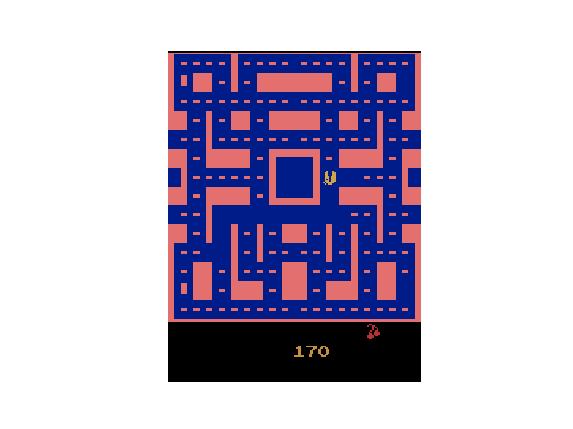

In [80]:
plot_animation(frames)

In [82]:
def preprocess_observation(obs):
    img = obs[34:194:2, ::2]
    return np.mean(img, axis=2).reshape(80, 80) / 255.0

In [83]:
env = gym.make("Breakout-v0")
obs = env.reset()
for step in range(10):
    obs, _, _, _ = env.step(1)
    
img = preprocess_observation(obs)

<IPython.core.display.Javascript object>


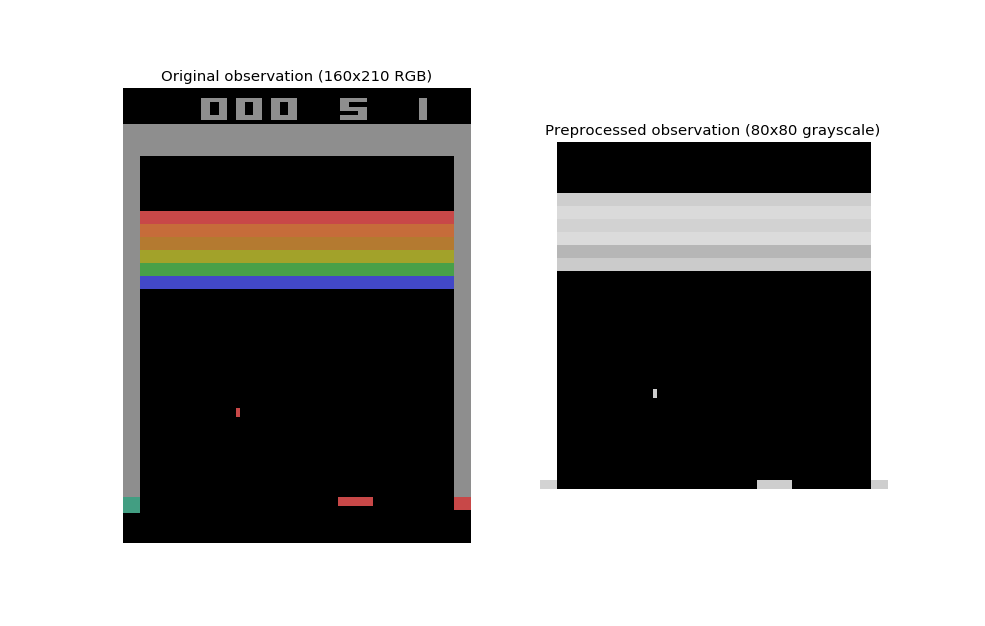

In [84]:
plt.figure(figsize=(11, 7))
plt.subplot(121)
plt.title("Original observation (160x210 RGB)")
plt.imshow(obs)
plt.axis("off")
plt.subplot(122)
plt.title("Preprocessed observation (80x80 grayscale)")
plt.imshow(img, interpolation="nearest", cmap="gray")
plt.axis("off")
plt.show()

In [85]:
from collections import deque

def combine_observation_multichannel(preprocess_observations):
    return np.array(preprocess_observations).transpose([1, 2, 0])

def combine_observation_singlechannel(preprocess_observations, dim_factor=0.5):
    dimmed_observations = [obs * dim_factor**index for index, obs in enumerate(reversed(preprocess_observations))]
    return np.max(np.array(dimmed_observations),axis=0)

n_observations_per_state = 3
preprocess_observations = deque([], maxlen=n_observations_per_state)

obs = env.reset()
for step in range(10):
    obs, _, _, _ = env.step(1)
    preprocess_observations.append(preprocess_observation(obs))

<IPython.core.display.Javascript object>


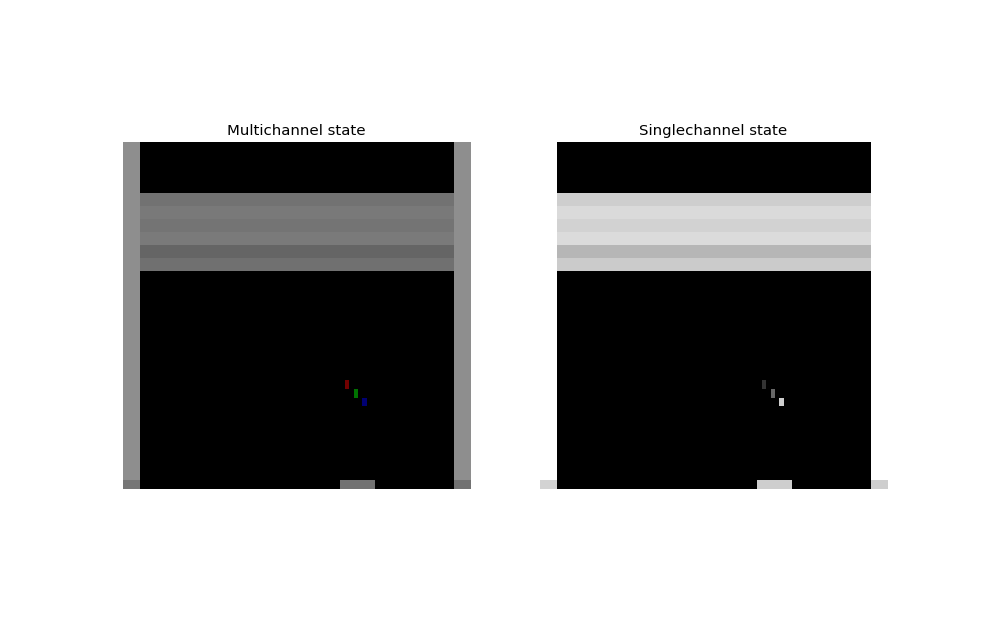

In [86]:
img1 = combine_observation_multichannel(preprocess_observations)
img2 = combine_observation_singlechannel(preprocess_observations)

plt.figure(figsize=(11, 7))
plt.subplot(121)
plt.title("Multichannel state")
plt.imshow(img1, interpolation="nearest")
plt.axis("off")
plt.subplot(122)
plt.title("Singlechannel state")
plt.imshow(img2, interpolation="nearest", cmap="gray")
plt.axis("off")
plt.show()